In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [6]:
# Load the dataset
data = pd.read_csv('/content/drive/MyDrive/Afame Tech/spam.csv', encoding='latin-1')

# Display the first few rows of the dataset
print(data.head())

     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  


In [7]:
# Drop unnecessary columns
data = data.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

# Rename columns
data.columns = ['label', 'message']

# Encode labels (ham=0, spam=1)
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

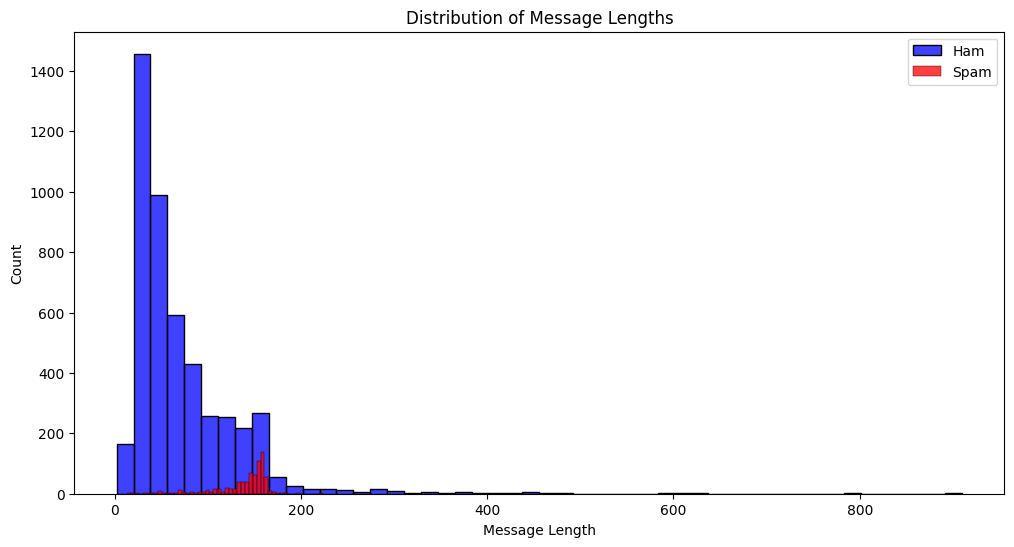

In [16]:
# Distribution of Message Lengths
data['length'] = data['message'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(data[data['label'] == 0]['length'], bins=50, color='blue', label='Ham')
sns.histplot(data[data['label'] == 1]['length'], bins=50, color='red', label='Spam')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.legend()
plt.show()

In [17]:
# Most Common Words in Spam and Ham Messages
from collections import Counter

def get_top_n_words(corpus, n=None):
    vec = TfidfVectorizer(stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_n = 20
spam_words = get_top_n_words(data[data['label'] == 1]['message'], top_n)
ham_words = get_top_n_words(data[data['label'] == 0]['message'], top_n)

spam_df = pd.DataFrame(spam_words, columns=['Word', 'Frequency'])
ham_df = pd.DataFrame(ham_words, columns=['Word', 'Frequency'])

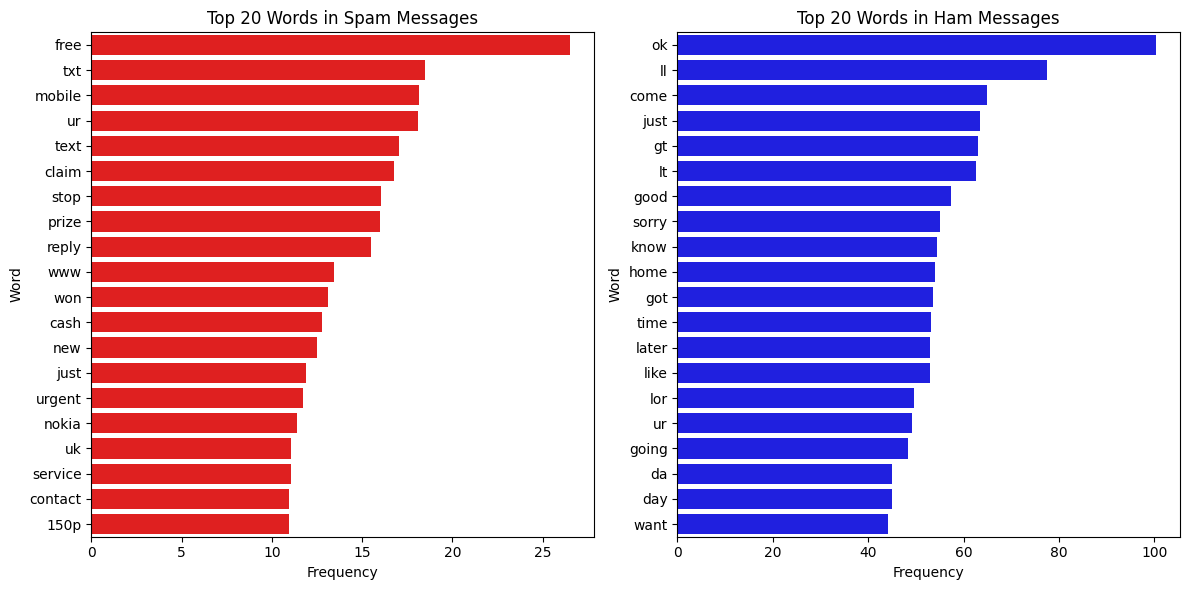

In [21]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Frequency', y='Word', data=spam_df, color='red')
plt.title('Top 20 Words in Spam Messages')
plt.subplot(1, 2, 2)
sns.barplot(x='Frequency', y='Word', data=ham_df, color='blue')
plt.title('Top 20 Words in Ham Messages')
plt.tight_layout()
plt.show()

In [22]:
# Word Clouds
spam_words = ' '.join(list(data[data['label'] == 1]['message']))
ham_words = ' '.join(list(data[data['label'] == 0]['message']))

spam_wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(spam_words)
ham_wc = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(ham_words)

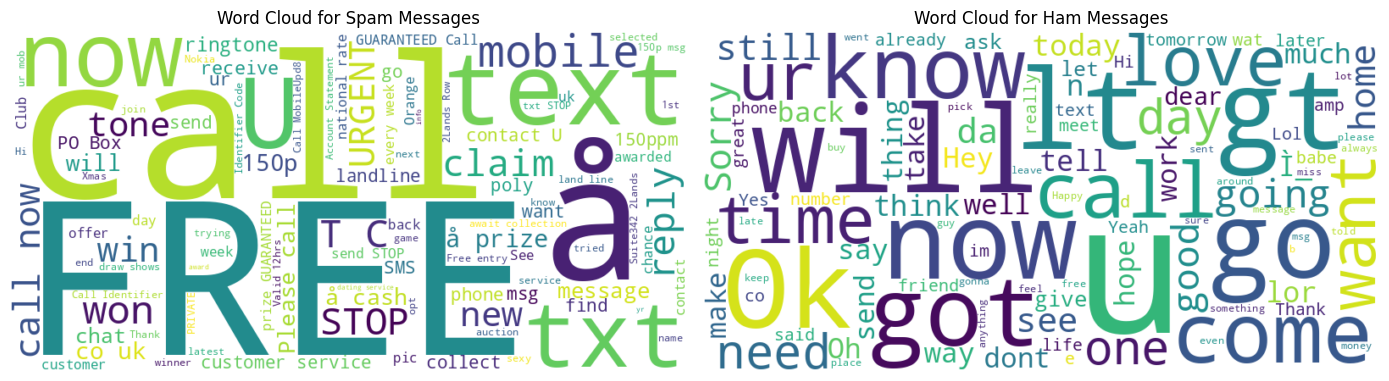

In [23]:
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.imshow(spam_wc, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ham_wc, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')

plt.tight_layout()
plt.show()

In [8]:
# Split the data into features and target variable
X = data['message']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Convert text data into numerical format using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

**Model Training and Evaluation**

Naive Bayes

In [10]:
# Train Naive Bayes model
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_nb = nb_model.predict(X_test_tfidf)

# Evaluation
print("Naive Bayes Report:")
print(classification_report(y_test, y_pred_nb))
print(f'Accuracy: {accuracy_score(y_test, y_pred_nb)}')

Naive Bayes Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       965
           1       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

Accuracy: 0.9668161434977578


Logistic Regression

In [11]:
# Train Logistic Regression model
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test_tfidf)

# Evaluation
print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print(f'Accuracy: {accuracy_score(y_test, y_pred_lr)}')


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.97      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Accuracy: 0.9524663677130045


<ipython-input-24-aba863c96e38>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=top_df, palette='viridis')


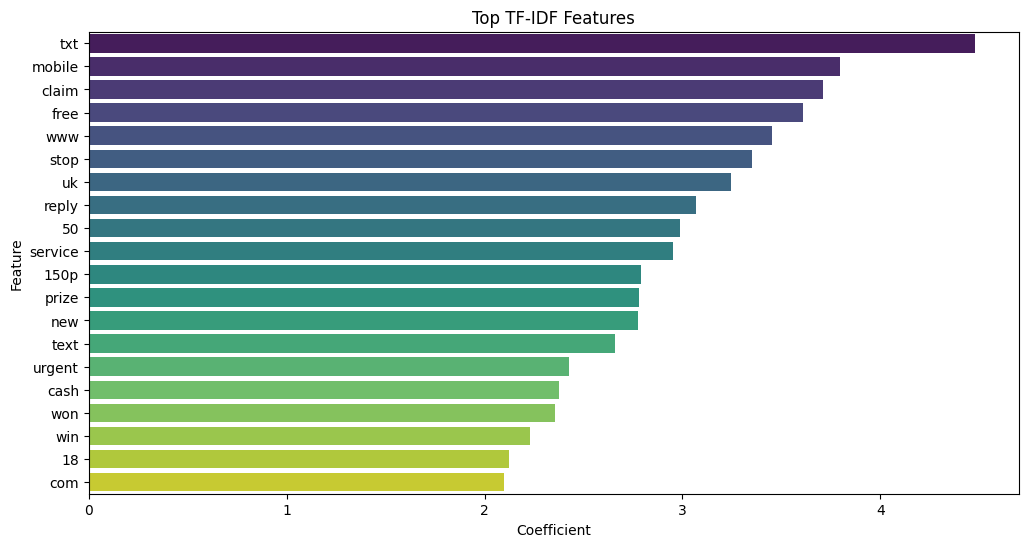

In [24]:
# Get the top TF-IDF features
feature_names = tfidf_vectorizer.get_feature_names_out()
top_n = 20

top_features = sorted(zip(lr_model.coef_[0], feature_names), reverse=True)[:top_n]
top_df = pd.DataFrame(top_features, columns=['Coefficient', 'Feature'])

plt.figure(figsize=(12, 6))
sns.barplot(x='Coefficient', y='Feature', data=top_df, palette='viridis')
plt.title('Top TF-IDF Features')
plt.show()

SVM

In [25]:
# Train SVM model
svm_model = SVC(kernel='linear', probability=True)
svm_model.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test_tfidf)

# Evaluation
print("SVM Report:")
print(classification_report(y_test, y_pred_svm))
print(f'Accuracy: {accuracy_score(y_test, y_pred_svm)}')


SVM Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.97      0.87      0.92       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Accuracy: 0.979372197309417


Confusion Matrices

In [26]:
# Confusion matrix for each model
confusion_nb = confusion_matrix(y_test, y_pred_nb)
confusion_lr = confusion_matrix(y_test, y_pred_lr)
confusion_svm = confusion_matrix(y_test, y_pred_svm)

# Display confusion matrices
print("Confusion Matrix for Naive Bayes:")
print(confusion_nb)

print("Confusion Matrix for Logistic Regression:")
print(confusion_lr)

print("Confusion Matrix for SVM:")
print(confusion_svm)

Confusion Matrix for Naive Bayes:
[[965   0]
 [ 37 113]]
Confusion Matrix for Logistic Regression:
[[962   3]
 [ 50 100]]
Confusion Matrix for SVM:
[[961   4]
 [ 19 131]]


HyperParameter Tuning

In [14]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

# Grid search
grid_search = GridSearchCV(SVC(probability=True), param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train_tfidf, y_train)

# Best parameters and score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.9s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   3.4s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.7s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   2.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.7s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   6.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.6s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   4.8s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   5.8s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   2.6s
[CV] END ....................C=0.1, gamma=0.1, k